In [1]:
from __future__ import division, print_function, absolute_import, unicode_literals

# Python imports
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
import seaborn
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
numpy.random.seed(seed=1)

from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [2]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = numpy.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x): return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = numpy.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

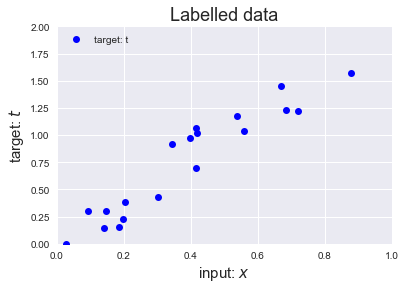

In [3]:
# Plot the target t versus the input x
plt.plot(x, t, 'bo', label='target: t')
plt.xlabel('input: $x$', fontsize=15)
plt.ylabel('target: $t$', fontsize=15)
plt.ylim([0,2])
plt.xlim([0,1])
plt.title('Labelled data', fontsize=18)
plt.legend(loc=2)
plt.show()

In [4]:
# Define the neural network function y = x * w
def nn(x, w): return x * w

# Define the cost function
def cost(y, t): return ((t - y)**2).sum()

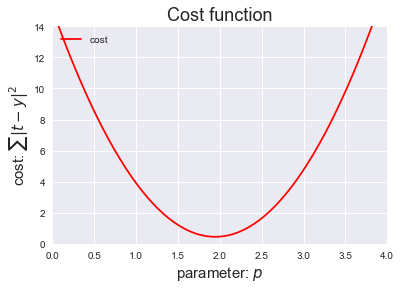

In [5]:
# Plot the cost vs the given weight w

# Define a vector of weights for which we want to plot the cost
ws = numpy.linspace(0, 4, num=100)  # weight values
cost_ws = numpy.vectorize(lambda w: cost(nn(x, w) , t))(ws)  # cost for each weight in ws

# Plot
plt.plot(ws, cost_ws, 'r-', label='cost')
plt.ylim([0,14])
plt.xlim([0,4])
plt.xlabel('parameter: $p$', fontsize=15)
plt.ylabel('cost: $\sum |t-y|^2$', fontsize=15)
plt.title('Cost function', fontsize=18)
plt.legend(loc=2)
plt.show()

In [6]:
# Animation functions
# Uses the Matplotlib animation module: http://matplotlib.org/api/animation_api.html
# More examples: http://matplotlib.org/examples/animation/

def init_fig():
    """Initialise figure"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    # Line vs data plot
    # Plot the fitted line agains the target line
    # Plot the target t versus the input x
    ax2.plot(x, t, 'bo', label='target: t')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('input: $x$', fontsize=15)
    ax2.set_ylabel('target: $t$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    ax2.set_title('Labelled data & model output', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='fitted line: $y=x*p$')
    ax2.legend(loc=2)
    # Cost function plot
    ax1.plot(ws, cost_ws, 'r-', label='cost')
    ax1.set_ylim([0, 14])
    ax1.set_xlim([0, 4])
    ax1.set_xlabel('parameter: $p$', fontsize=15)
    ax1.set_ylabel('cost: $\sum |t-y|^2$', fontsize=15)
    cost_text = ax1.set_title('Cost at step {}'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivative at $p$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text


def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    """Return animation function."""
    xs = numpy.linspace(0, 4, num=100)  # weight values
    #(w, dw, cost)
    def anim(i):
        """Animate step i"""
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('Cost at step {} = {:.3f}'.format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

In [7]:
# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): 
    return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.3
# Set the learning rate
learning_rate = 0.05

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 11  # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), t))] # List to store the weight,costs values
weights = [(w, gradient(w, x, t).sum(), cost(nn(x, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Get the delta w update
    w = w - dw  # Update the current weight parameter
    gw = gradient(w, x, t).sum()
    c = cost(nn(x, w), t)
    w_cost.append((w, c))  # Add weight,cost to list
    weights.append((w, gw, c))

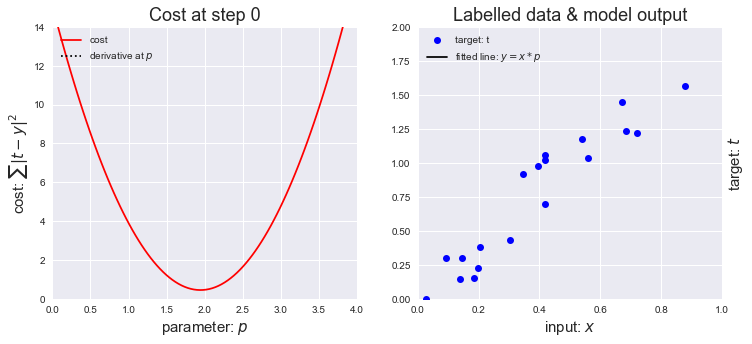

In [8]:
# Create animation (uses ffmpeg)
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig()
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)

anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=800, blit=True)

In [9]:
anim

In [10]:
# # Create gif from animation (uses ImageMagick)
gif_path = 'E:\jupyter\gradient_descent.gif'
anim.save(gif_path, writer='imagemagick', fps=1000/800)
Image(url=gif_path)

e:\jupyter\.venv\lib\site-packages\matplotlib\animation.py:1021: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


OSError: Error saving animation to file (cause: [Errno 22] Invalid argument) Stdout: b'' StdError: b''. It may help to re-run with --verbose-debug.